<a href="https://colab.research.google.com/github/siveshb1/Deep-Learning-Projects/blob/main/Neutral_Network_Regression_(Insurance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
insurance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance = pd.get_dummies(insurance, ['sex', 'smoker','region'])

In [ ]:
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [ ]:
X_train.iloc[0].shape

(6,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 8ms/step - loss: 8602.5791 - mae: 8602.5791
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 7888.3999 - mae: 7888.3999
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7608.1641 - mae: 7608.1641
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7708.4204 - mae: 7708.4204
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7670.1523 - mae: 7670.1523
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7642.4497 - mae: 7642.4497
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7551.3032 - mae: 7551.3032
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7720.9150 - mae: 7720.9150
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7552.8750 - mae: 7552.8750
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7729.4844 - mae: 7729.4844

In [ ]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 9ms/step - loss: 7047.5244 - mae: 7047.5244


[7047.5244140625, 7047.5244140625]

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])



insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=10)

history = insurance_model_2.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[early_stopping] )

In [ ]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.8665 - mae: 3169.8665


[3169.866455078125, 3169.866455078125]

Text(0, 0.5, 'loss')

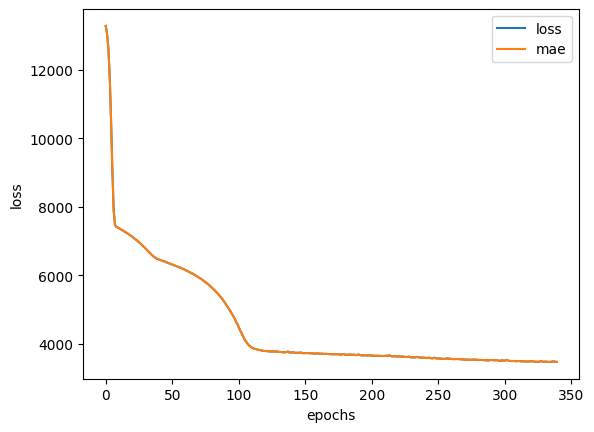

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

<Axes: ylabel='Frequency'>

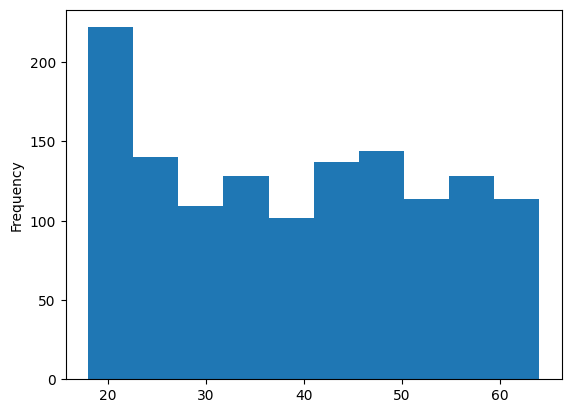

In [ ]:
X['age'].plot(kind='hist')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),

    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
    )

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train_normal,y_train, epochs=200, verbose=0)

In [ ]:
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3168.9211 - mae: 3168.9211


[3168.921142578125, 3168.921142578125]